In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim


In [6]:
train_dir = r'C:\Users\abanoup\Downloads\Compressed\Intel Image Classification Dataset\seg_train\seg_train'
test_dir = r'C:\Users\abanoup\Downloads\Compressed\Intel Image Classification Dataset\seg_test\seg_test'


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train & validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='categorical', subset='validation')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='categorical')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
cnn_model.summary()

C:\Users\abanoup\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
x_batch, y_batch = next(train_generator)
print(f"Sample input shape: {x_batch.shape}")
print(f"Sample label shape: {y_batch.shape}")


Sample input shape: (32, 150, 150, 3)
Sample label shape: (32, 6)


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [11]:
import os

# List the directories inside training folder
print("Training classes:", os.listdir(train_dir))
print("Testing classes:", os.listdir(test_dir))


Training classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Testing classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [12]:
history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)


C:\Users\abanoup\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 330s 930ms/step - accuracy: 0.4726 - loss: 1.3019 - val_accuracy: 0.6765 - val_loss: 0.8561
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.6549 - loss: 0.8985 - val_accuracy: 0.7315 - val_loss: 0.7508
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.7332 - loss: 0.7416 - val_accuracy: 0.7668 - val_loss: 0.6562
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 290s 825ms/step - accuracy: 0.7518 - loss: 0.7051 - val_accuracy: 0.7414 - val_loss: 0.7070
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 283s 806ms/step - accuracy: 0.7617 - loss: 0.6598 - val_accuracy: 0.7974 - val_loss: 0.5644
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 278s 791ms/step - accuracy: 0.7689 - loss: 0.6120 - val_accuracy: 0.8024 - val_loss: 0.5662
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 275s 782ms/step - accuracy: 0.7910 - loss: 0.5802 - val_accuracy: 0.8174 - val_loss: 0.5210
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 276s 786ms/step - accuracy: 0.7902 - loss:

In [13]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.7958 - loss: 0.5632
Test Accuracy: 79.23%


In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
# Load dataset
train_data = ImageFolder(root=train_dir, transform=transform)
test_data = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Get class labels
class_names = train_data.classes
print(f"Classes: {class_names}")


Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [15]:
import torch.nn as nn
import torch.optim as optim

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 18 * 18, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 6)  # 6 classes
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 128 * 18 * 18)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model
model = CNN()


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve history
history_dict = history.history


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("Training Complete!")


Epoch 1, Loss: 0.8764695520417294


KeyboardInterrupt: 

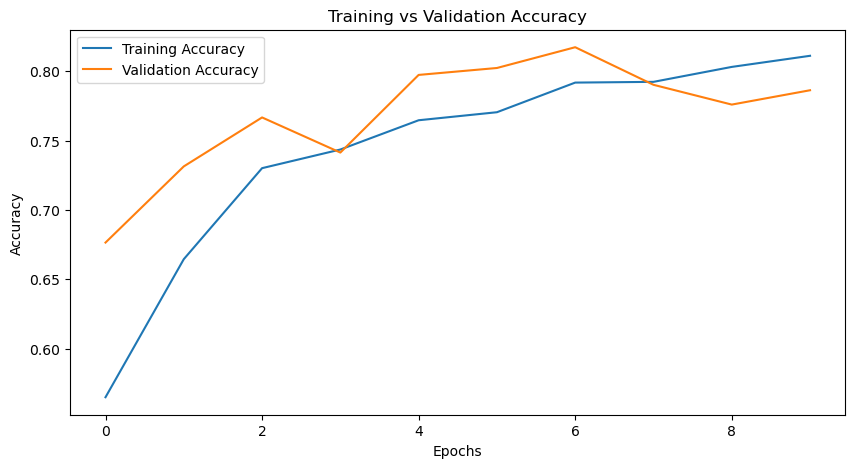

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


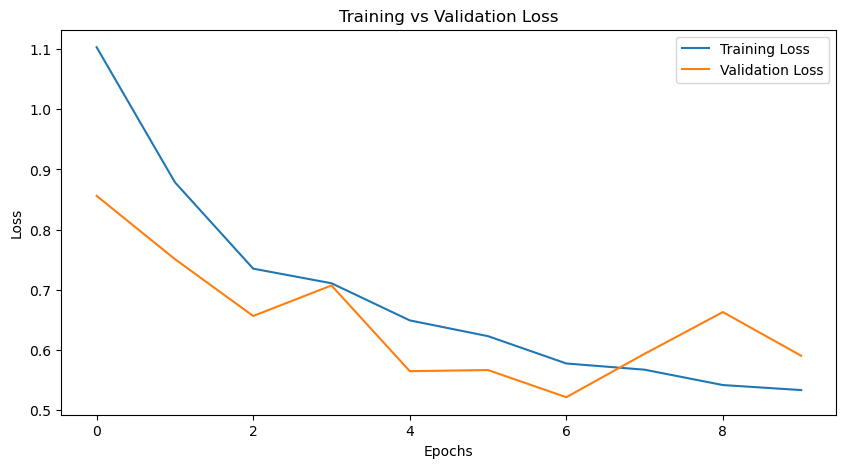

In [19]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step


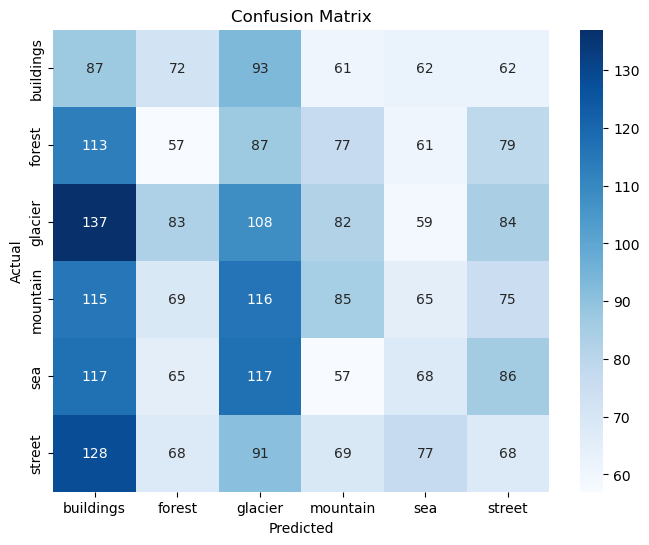

In [20]:
# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(cnn_model.predict(test_generator), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 80.70%
